In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
%matplotlib inline

In [3]:
csv_path = 'E:\work\dataset\progress_subset.csv'
img_path = 'E:\work\dataset\cropped_256'
df = pd.read_csv(csv_path, low_memory=False)
img_folder = img_path



In [10]:
namelist = []
for i in range(len(df)):
    filename = df.iloc[i]["name"]
    try:
        image = PIL.Image.open(os.path.join(img_folder,filename))
    except FileNotFoundError:
        print(filename)
        namelist += [filename]

90001-AP461-L.jpg
90071-TZ172-L.jpg
90082-WM484-L.jpg
90082-VR283-L.jpg
90083-XG066-L.jpg
90083-RG649-L.jpg
90083-DH450-L.jpg
90083-AA630-L.jpg
90083-PU561-L.jpg
90083-LJ919-L.jpg
90083-PK688-L.jpg
90083-ST177-L.jpg
90083-UJ317-L.jpg
90083-OE268-L.jpg
90083-EM538-L.jpg
90083-FL802-L.jpg
90084-YD161-L.jpg
90084-OK140-L.jpg
90084-FR394-L.jpg
90084-VF069-L.jpg
90084-VE824-L.jpg
90084-RQ144-L.jpg
90084-XZ288-L.jpg
90084-PU200-L.jpg
90084-OU384-L.jpg
90084-YI562-L.jpg
90084-AX898-L.jpg
90085-RU035-L.jpg
90085-QQ798-L.jpg
90085-YO644-L.jpg
90085-PC054-L.jpg
90085-GI717-L.jpg
90085-TV404-L.jpg
90085-UZ956-L.jpg
90085-WF088-L.jpg
90085-DO581-L.jpg
90085-OY144-L.jpg
90085-YK986-L.jpg
90085-FJ429-L.jpg
90086-HF848-L.jpg
90086-NW922-L.jpg
90086-BV848-L.jpg
90087-MF240-L.jpg
90087-JH065-L.jpg
90087-HH714-L.jpg
90087-AN384-L.jpg
90087-IU978-L.jpg
90090-DM027-L.jpg
90090-JA686-L.jpg
90090-IY198-L.jpg
90090-QE939-L.jpg
90100-AP327-L.jpg
90118-FO420-L.jpg
90118-DF569-L.jpg
90118-JK126-L.jpg
90118-IF58

In [11]:
len(namelist)

70

In [14]:
df = df[~df['name'].isin(namelist)].reset_index()
df.to_csv('progress_subset.csv')

Text(0, 0.5, 'Similarity score')

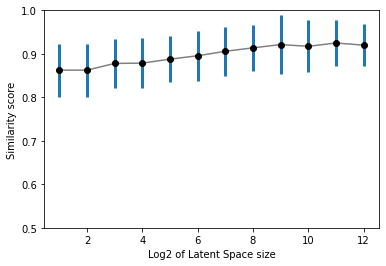

In [27]:
plt.errorbar(np.log2(df['nl']), df['sim_mean'],df['sim_std'], fmt='o', lw=3,markeredgecolor='k', markerfacecolor='k')
plt.plot(np.log2(df['nl']), df['sim_mean'],color='grey')
#plt.errorbar(np.log2(df['nl']), df['sim_mean'], [df['sim_mean'] - df['sim_min'], df['sim_max'] - df['sim_mean']],
#             fmt='.k', ecolor='gray', lw=1)
plt.ylim(0.5,1)
plt.xlabel('Log2 of Latent Space size')
plt.ylabel('Similarity score')

Text(0, 0.5, 'Loss')

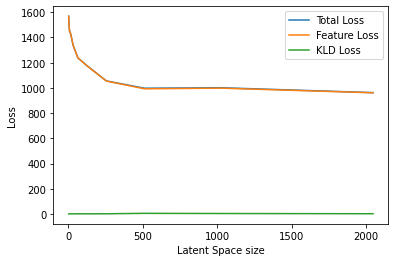

In [31]:
plt.plot(df['nl'][:-1],df['loss'][:-1],label = 'Total Loss')
plt.plot(df['nl'][:-1],df['bce'][:-1], label = 'Feature Loss')
plt.plot(df['nl'][:-1],df['kld'][:-1], label = 'KLD Loss')
plt.legend()
plt.xlabel('Latent Space size')
plt.ylabel('Loss')
